# Plotting the i/o of the n_body code
This code provides functions which return all the physical quantities of the input/output files of nbody_sh1.c, plus some plot examples.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const
from tqdm import tqdm

In [2]:
two_dim = False #if system is 2 dimensional = True
inputname = 'input.txt'
outputname = 'output.txt'
orbit_plot = True #if we want to plot the orbit of a single particle (usually the 1st) = True

In [3]:
def input_opening(inputname = ''):
    inputf = open(inputname, 'r')

    N = int(inputf.readline()) #reading the number of particles
    t_0 = float(inputf.readline()) #reading starting time

    particles_0 = inputf.readlines() #collecting all the initial information about the particles

    inputf.close()

    particles_0 = [p.split() for p in particles_0] #splitting the collected lines

    for i in range(N):
        for j in range(len(particles_0[0])):
            particles_0[i][j] = float(particles_0[i][j]) #turning the particles lists into float variables
    
    mass_0 = [particles_0[i][0] for i in range(N)] #collecting the mass of the particles

    #dividing the leftover information into a position and a velocity vector
    position_0 = np.empty([N, 3])
    velocity_0 = np.empty([N, 3])
    
    for i in range(N):
        for j in range(1, 4, 1):
            position_0[i][j-1] = particles_0[i][j]
    
    for i in range(N):
        for j in range(4, 7, 1):
            velocity_0[i][j-4] = particles_0[i][j]
            
    return N, t_0, mass_0, position_0, velocity_0

def output_opening(outputname = ''):
    outputf = open(outputname, 'r')
    output = outputf.readlines() #reading all the lines as one compact object
    outputf.close()

    output = [o.split() for o in output]  #splitting them in each line
    #output is a list of each line, where each line is a list itself

    N = int(output[0][0]) #taking the first element as the # of particles
    output_l = len(output) #checking the length of the file
    snapshot_n = int(output_l/(2 + N)) #and dividing by 2 + N to get the # of snapshots

    time = np.empty(snapshot_n)
    for i, j in zip(range(1, output_l, 2 + N), range(snapshot_n)):
        time[j] = float(output[i][0]) #collecting the time of each snapshot

    position = np.empty([N, snapshot_n, 3]) #position of i particle at s snapshot (0 = x, 1 = y, 2 = z)
    velocity = np.empty([N, snapshot_n, 3]) #same as position
    for i in range(N):
        for j, k in zip(range(snapshot_n), range(2 + i, output_l, 2 + N)):
            position[i][j] = output[k][1:4]
            velocity[i][j] = output[k][4:7]
            
    return snapshot_n, time, position, velocity

Once we have our opening functions, we take all the vectors which will be used for further mathematical computations or for plotting.

In [4]:
n_particles, init_time, masses, init_pos, init_vel = input_opening (inputname)
n_snapshot, time, positions, velocities = output_opening (outputname)

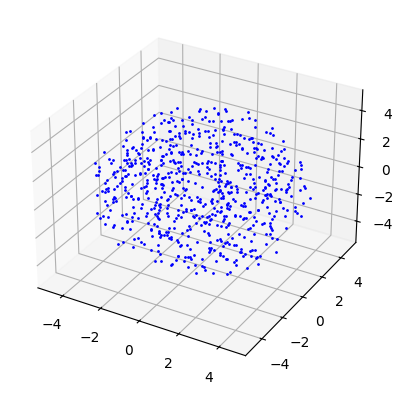

In [6]:
fig = plt.figure()
if (two_dim == True):
    ax = fig.add_subplot()
    for i in range(n_particles): ax.scatter(init_pos[i][0], init_pos[i][1], color = 'b', s = 1)
else:
    ax = fig.add_subplot(projection='3d')
    for i in range(n_particles): ax.scatter(init_pos[i][0], init_pos[i][1], init_pos[i][2], color = 'b', s = 1)
        
plt.show()

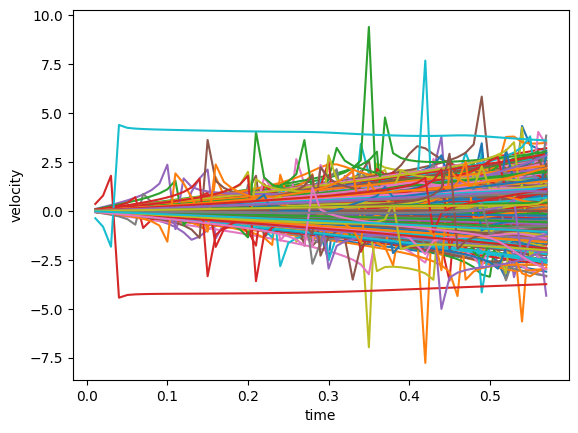

In [9]:
for i in range(n_particles): plt.plot(time, velocities[i, :, 0])
plt.ylabel('velocity')
plt.xlabel('time')
plt.show()

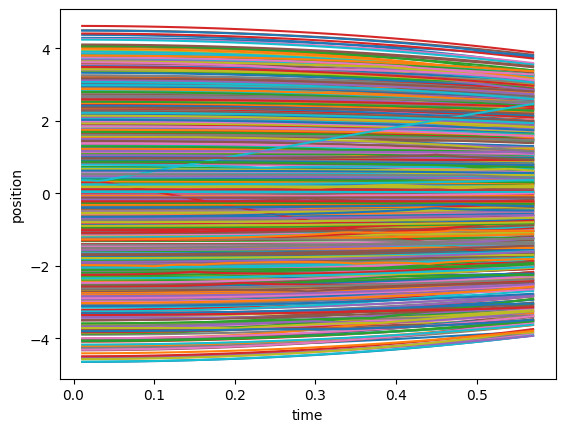

In [11]:
for i in range(n_particles): plt.plot(time, positions[i, :, 0])
plt.ylabel('position')
plt.xlabel('time')
plt.show()

In [15]:
def compute_radius(ppp):
    radius = []
    for i in range(n_particles): radius.append(np.sqrt(ppp[i, :, 0]**2 + ppp[i, :, 1]**2 + ppp[i, :, 2]**2))
    radius = np.array(radius)
    return radius

In [16]:
radius = compute_radius(positions)

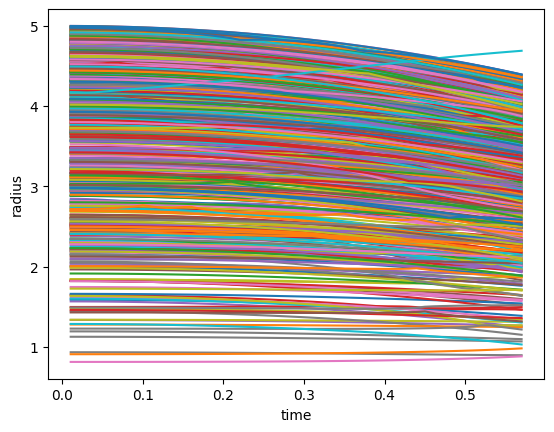

In [19]:
for i in range(n_particles): plt.plot(time, radius[i])
plt.ylabel('radius')
plt.xlabel('time')
plt.show()

100%|█████████████████████████████████████████████████████████████████████████████████| 57/57 [00:00<00:00, 185.16it/s]


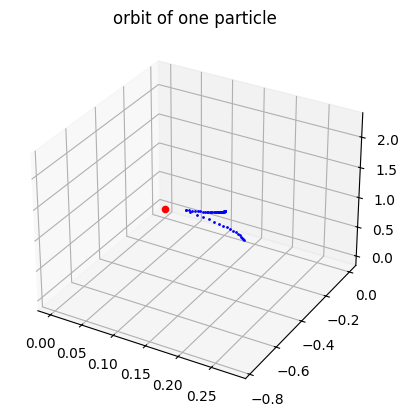

In [20]:
if (orbit_plot == True):
    fig = plt.figure()
    if (two_dim == True):
        ax = fig.add_subplot()
        ax.set_aspect('equal')
        ax.scatter(0, 0, color='r')
        for i in tqdm(range(n_snapshot)): ax.scatter(positions[5][i][0], positions[1][i][1], color = 'b', s = 1)
    else:
        ax = fig.add_subplot(projection='3d')
        ax.scatter(0, 0, 0, color = 'r')
        for i in tqdm(range(n_snapshot)): ax.scatter(positions[5][i][0], positions[1][i][1], positions[1][i][2], color = 'b', s = 1)
    plt.title('orbit of one particle')
    plt.show()